In [402]:
import numpy as np
import random

def generator(m,n,theta):
    rg = np.random.default_rng(8)
    beta = rg.random((m+1,1))
    pre_x = np.random.rand(n,m)
    xzero = np.ones((n,1))
    x = np.concatenate((xzero,pre_x),axis=1)
    noise = np.random.binomial(1,theta,size = (n,1))
    pre_y = 1/(1+ np.exp(-np.dot(x,beta)))
    pre_y = np.where((pre_y>0.5),1,0)
    for i in range(noise.shape[0]):
        if noise[i] == 1:
            pre_y[i] = 1 - pre_y[i]
    y = pre_y
    return x,y,beta

In [392]:
# Implementing Logistic Regression

def flip(ar1):
    for i in range(ar1.shape[0]):
        ar1[i] = 1 - ar1[i]
    return ar1

def cost(y,x,beta):
        pre_y = 1/(1+ np.exp(-np.dot(x,beta)))
        costvalue = -np.mean(y * np.log(pre_y) + (1 - y) * np.log(1 - pre_y))      
        return costvalue

def improvement(y, x, beta):
    y_pred = 1 / (1 + np.exp(-np.dot(x, beta)))
    distance = y_pred - y 
    impro = np.dot(x.T, distance) / len(y)
    return impro

def logreg(x,y,k,tau,lam):
    rg = np.random.default_rng()
    beta = rg.random((x.shape[1],1))
    initcost = 0
    costvalue = cost(y,x,beta)
    for i in range(k):
        if  abs(costvalue - initcost) > tau:
            initcost = costvalue
            impro = improvement(y,x,beta)
            beta = beta - lam*impro
            costvalue = cost(y,x,beta)
        else:
            break
    return beta,costvalue

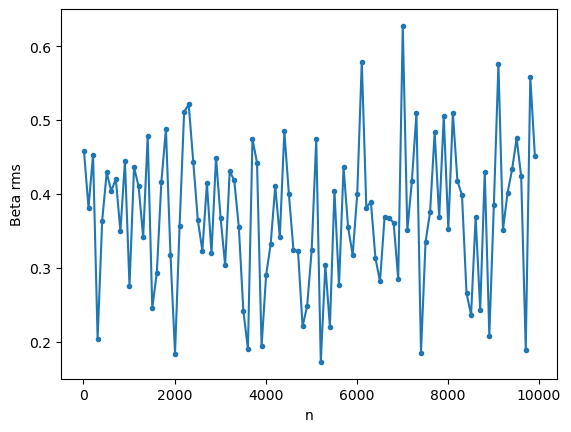

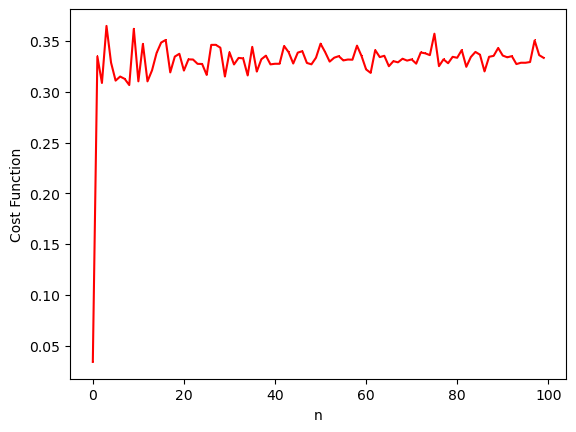

In [413]:
# Varying n vs cost function and rms of beta
n = np.arange(10,10000,100)
absbetas = []
costs = []
for i in n:
    x,y,beta = generator(5,i,0.1)
    b_u, c = logreg(x,y,1000,1e-7,0.01)
    absbetas.append(np.sqrt(np.mean((beta-b_u)**2)))
    costs.append(c)
plt.plot(n,absbetas,marker = ".")
plt.ylabel("Beta rms")
plt.xlabel("n")
plt.show()
plt.plot(costs,marker = ",", color = "red")
plt.ylabel("Cost Function")
plt.xlabel("n")
plt.show()

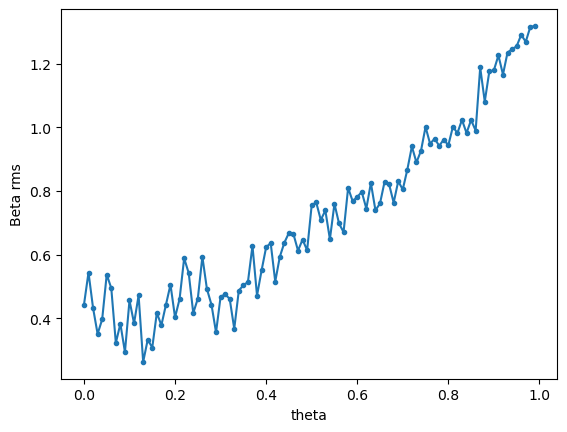

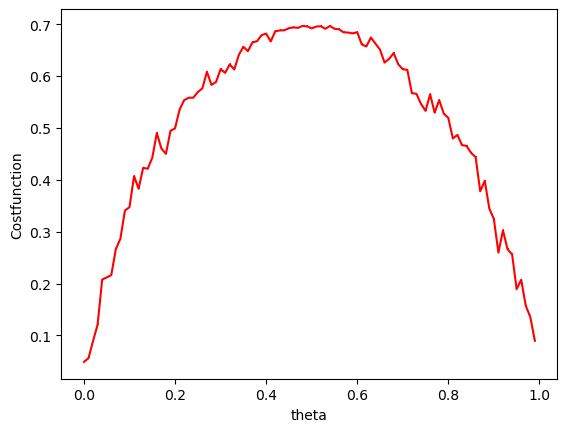

In [415]:
# Varying theta vs costfunction and rms of beta differnce

theta = np.arange(0,1,0.01)
absbetas = []
costs = []
for i in theta:
    x,y,beta = generator(5,1000,i)
    b_u, c = logreg(x,y,1000,1e-7,0.01)
    absbetas.append(np.sqrt(np.mean((beta-b_u)**2)))
    costs.append(c)

plt.plot(theta,absbetas,marker = ".")
plt.ylabel("Beta rms")
plt.xlabel("theta")
plt.show()
plt.plot(theta,costs,marker = ",", color = "red")
plt.ylabel("Costfunction")
plt.xlabel("theta")
plt.show()

In [369]:
#Implementing L1 and L2 realization

import matplotlib.pyplot as plt

def flip(ar1):
    for i in range(ar1.shape[0]):
        ar1[i] = 1 - ar1[i]
    return ar1

def cost2(y,x,beta,l1,l2):
        pre_y = 1/(1+ np.exp(-np.dot(x,beta)))
        costvalue = -np.mean(y * np.log(pre_y) + (1 - y) * np.log(1 - pre_y))
        reg_terms = l1*np.sum(np.abs(beta)) + l2*np.sum((beta**2))
        return costvalue

def improvement2(y, x, beta,l1,l2):
    y_pred = 1 / (1 + np.exp(-np.dot(x, beta)))
    distance = y_pred - y 
    impro = np.dot(x.T, distance) / len(y)
    reg_impro = l1*np.sign(beta) + 2*l2*beta
    return impro + reg_impro

def logreg2(x,y,k,tau,lam,l1,l2):
    rg = np.random.default_rng()
    beta = rg.random((x.shape[1],1))
    initcost = 0
    costvalue = cost2(y,x,beta,l1,l2)
    for i in range(k):
        if  abs(costvalue - initcost) > tau:
            initcost = costvalue
            impro = improvement2(y,x,beta,l1,l2)
            beta = beta - lam*impro
            costvalue = cost2(y,x,beta,l1,l2)
        else:
            break
    return beta,costvalue

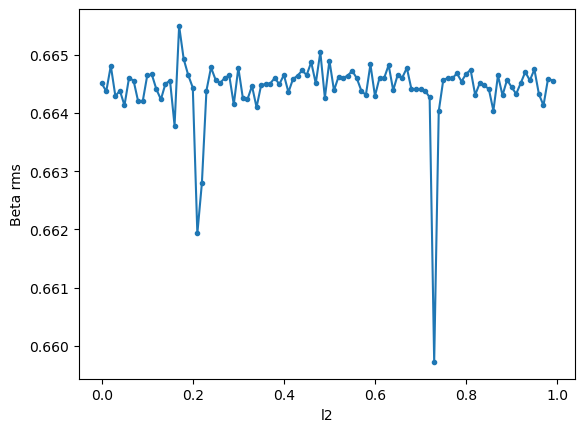

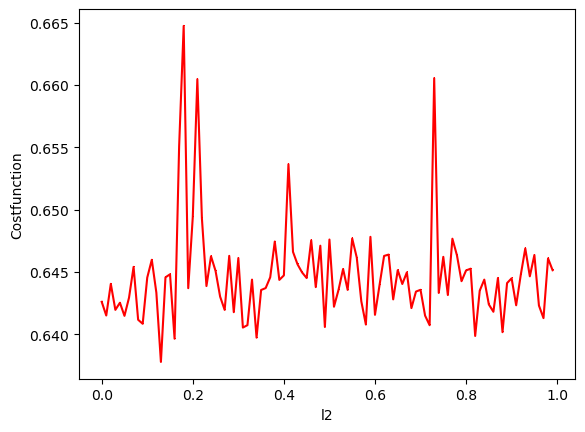

In [416]:
# Varying l2 vs costfunction 

l2= np.arange(0,1,0.01)
absbetas = []
costs = []
for i in l2:
    x,y,beta = generator(5,1000,0.01)
    b_u, c = logreg2(x,y,1000,1e-7,0.01,0.4,l2)
    absbetas.append(np.sqrt(np.mean((beta-b_u)**2)))
    costs.append(c)
plt.plot(l2,absbetas,marker = ".")
plt.ylabel("Beta rms")
plt.xlabel("l2")
plt.show()
plt.plot(l2,costs,marker = ",", color = "red")
plt.ylabel("Costfunction")
plt.xlabel("l2")
plt.show()

In [ ]:
# Varying l1 vs costfunction

l1= np.arange(0,1,0.01)
absbetas = []
costs = []
for i in l1:
    x,y,beta = generator(5,1000,0.01)
    b_u, c = logreg2(x,y,1000,1e-7,0.01,l1,0.01)
    absbetas.append(np.sqrt(np.mean((beta-b_u)**2)))
    costs.append(c)

plt.plot(l1,absbetas,marker = ".")
plt.ylabel("Beta rms")
plt.xlabel("l1")
plt.show()
plt.plot(l1,costs,marker = ",", color = "red")
plt.ylabel("Costfunction")
plt.xlabel("l1")
plt.show()

In [406]:
# Making a class

class RegressionModels:
    def __init__(self,x,y,k,tau,lam):
        self.x = x
        self.y = y
        self.beta = beta
        self.k = k
        self.tau = tau
        self.lam = lam
        
    def cost(self,beta):
        pass
    
    def improvement(self,beta):
        pass
    
    def fit(self):
        pass
    
class LinearRegression(RegressionModels):
    def cost(self,beta):
        distance = self.y - np.dot(self.x,beta) 
        sums = np.mean(distance**2)
        return np.sqrt(sums)

    def improvement(self,beta):
        costvalue = cost(self,beta)
        for i in range(x.shape[1]):
            betavalue = (beta[i])
            distance = y - np.dot(self.x,beta)
            improvement = -np.dot((self.x).T,distance)/(costvalue*(self.x).shape[0])
        return improvement
    
    def fit(self):
        rg = np.random.default_rng()
        beta = rg.random(((self.x).shape[1],1))
        ypred = np.dot(self.x,beta)
        initcost = 0
        costvalue = cost(self.y,beta)
        for i in range(k):
            if  abs(costvalue - initcost) > self.tau:
                initcost = costvalue
                impro = improvement(self.y,self.x,beta)
                beta = beta - lam*impro
                ypred = np.dot(self.x,beta)
                costvalue = cost(self.x,beta)
            else:
                break
        return beta,costvalue
    
class LogisticRegression(RegressionModels):
    def flip(ar1):
        for i in range(ar1.shape[0]):
            ar1[i] = 1 - ar1[i]
        return ar1

    def cost(beta):
            pre_y = 1/(1+ np.exp(-np.dot(self.x,beta)))
            costvalue = -np.mean(self.y * np.log(pre_y) + (1 - y) * np.log(1 - pre_y))      
            return costvalue

    def improvement(beta):
        y_pred = 1 / (1 + np.exp(-np.dot(self.x, beta)))
        distance = y_pred - self.y 
        impro = np.dot((self.x).T, distance) / len(y)
        return impro

    def logreg(self):
        rg = np.random.default_rng()
        beta = rg.random(((self.x).shape[1],1))
        initcost = 0
        costvalue = cost(beta)
        for i in range(k):
            if  abs(costvalue - initcost) > self.tau:
                initcost = costvalue
                impro = improvement(beta)
                beta = beta - lam*impro
                costvalue = cost(beta)
            else:
                break
        return beta,costvalue
